In [1]:
!pip install kaggle

     ---------------------------------------- 82.1/82.1 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105130 sha256=54298b82eeabc15abc849e6613458c453be5b7eba48deb0eaf4f590a2d83cba9
  Stored in directory: c:\users\neil shah\appdata\local\pip\cache\wheels\ec\d9\04\93be57edf3835182a8e76d8ff87f7e77a0113f473ba3721ee0
Successfully built kaggle


In [3]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other




  0%|          | 0.00/80.9M [00:00<?, ?B/s]
  1%|          | 1.00M/80.9M [00:01<02:01, 690kB/s]
  2%|▏         | 2.00M/80.9M [00:01<00:59, 1.39MB/s]
  4%|▎         | 3.00M/80.9M [00:01<00:36, 2.25MB/s]
  6%|▌         | 5.00M/80.9M [00:02<00:18, 4.23MB/s]
  9%|▊         | 7.00M/80.9M [00:02<00:11, 6.54MB/s]
 11%|█         | 9.00M/80.9M [00:02<00:09, 8.21MB/s]
 14%|█▎        | 11.0M/80.9M [00:02<00:07, 9.67MB/s]
 16%|█▌        | 13.0M/80.9M [00:02<00:06, 10.5MB/s]
 19%|█▊        | 15.0M/80.9M [00:02<00:06, 11.2MB/s]
 21%|██        | 17.0M/80.9M [00:02<00:05, 11.7MB/s]
 23%|██▎       | 19.0M/80.9M [00:03<00:05, 11.8MB/s]
 26%|██▌       | 21.0M/80.9M [00:03<00:05, 12.3MB/s]
 28%|██▊       | 23.0M/80.9M [00:03<00:04, 12.5MB/s]
 31%|███       | 25.0M/80.9M [00:03<00:04, 12.6MB/s]
 33%|███▎      | 27.0M/80.9M [00:03<00:04, 12.6MB/s]
 36%|███▌      | 29.0M/80.9M [00:03<00:04, 12.7MB/s]
 38%|███▊      | 31.0M/80.9M [00:04<00:04, 12.7MB/s]
 41%|████      | 33.0M/80.9M [00:04<00:03, 12.7MB/s]
 4

In [11]:
from zipfile import ZipFile

dataset= 'sentiment140.zip'

with ZipFile(dataset, 'r') as zip_ref:
    zip_ref.extractall()
    print('done')

done


In [14]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords   
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk


In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Neil
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
print(stopwords.words('english'))   

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
twitter_data=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin',header=None)

In [43]:
twitter_data

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [44]:
twitter_data.shape

(1600000, 6)

In [45]:
twitter_data.columns=['target','id','date','flag','user','text']

In [21]:
twitter_data

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [46]:
twitter_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [30]:
sia=SentimentIntensityAnalyzer()

In [28]:
sia.polarity_scores('i love you')


{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [29]:
sia.polarity_scores('i hate you')

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [48]:
results={}
for i, row in tqdm(twitter_data.iterrows(),total=len(twitter_data)):
    results[i]=sia.polarity_scores(row['text'])
   


  0%|          | 0/1600000 [00:00<?, ?it/s]

In [49]:
twitter_data['text']

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

In [50]:
results

{0: {'neg': 0.129, 'neu': 0.745, 'pos': 0.126, 'compound': -0.0173},
 1: {'neg': 0.303, 'neu': 0.697, 'pos': 0.0, 'compound': -0.75},
 2: {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4939},
 3: {'neg': 0.321, 'neu': 0.5, 'pos': 0.179, 'compound': -0.25},
 4: {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.6597},
 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.4767},
 7: {'neg': 0.093, 'neu': 0.548, 'pos': 0.359, 'compound': 0.745},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'compound': -0.5994},
 13: {'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'compound': -0.1027},
 14: {'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.3724},
 15: {'neg': 0.083, 'neu': 0.73, 'p

In [52]:


# Create a new dataframe with only the "text" and "results" columns
new_dataframe = twitter_data[['text']].copy()

# Print the new dataframe
print(new_dataframe)

                                                      text
0        @switchfoot http://twitpic.com/2y1zl - Awww, t...
1        is upset that he can't update his Facebook by ...
2        @Kenichan I dived many times for the ball. Man...
3          my whole body feels itchy and like its on fire 
4        @nationwideclass no, it's not behaving at all....
...                                                    ...
1599995  Just woke up. Having no school is the best fee...
1599996  TheWDB.com - Very cool to hear old Walt interv...
1599997  Are you ready for your MoJo Makeover? Ask me f...
1599998  Happy 38th Birthday to my boo of alll time!!! ...
1599999  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 1 columns]


In [53]:
results_df = pd.DataFrame(results).T

In [54]:
results_df

,neg,neu,pos,compound
0,0.129,0.745,0.126,-0.0173
1,0.303,0.697,0.000,-0.7500
2,0.000,0.833,0.167,0.4939
3,0.321,0.500,0.179,-0.2500
4,0.241,0.759,0.000,-0.6597
...,...,...,...,...
1599995,0.138,0.503,0.358,0.5423
1599996,0.000,0.757,0.243,0.4376
1599997,0.000,0.800,0.200,0.3612
1599998,0.000,0.706,0.294,0.6784


In [55]:
results_df=results_df.reset_index().rename(columns={'index':'Id'})
results_df= results_df.merge(new_dataframe, left_on='Id', right_index=True)

In [56]:
results_df

,Id,neg,neu,pos,compound,text
0,0,0.129,0.745,0.126,-0.0173,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,0.303,0.697,0.000,-0.7500,is upset that he can't update his Facebook by ...
2,2,0.000,0.833,0.167,0.4939,@Kenichan I dived many times for the ball. Man...
3,3,0.321,0.500,0.179,-0.2500,my whole body feels itchy and like its on fire
4,4,0.241,0.759,0.000,-0.6597,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,1599995,0.138,0.503,0.358,0.5423,Just woke up. Having no school is the best fee...
1599996,1599996,0.000,0.757,0.243,0.4376,TheWDB.com - Very cool to hear old Walt interv...
1599997,1599997,0.000,0.800,0.200,0.3612,Are you ready for your MoJo Makeover? Ask me f...
1599998,1599998,0.000,0.706,0.294,0.6784,Happy 38th Birthday to my boo of alll time!!! ...


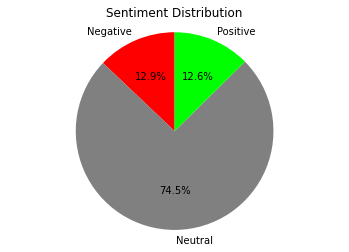

In [62]:
import matplotlib.pyplot as plt

negative = results[0]['neg']
neutral = results[0]['neu']
positive = results[0]['pos']

labels = ['Negative', 'Neutral', 'Positive']
sizes = [negative, neutral, positive]
colors = ['#FF0000', '#808080', '#00FF00']  # Red for negative, Gray for neutral, Green for positive

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Sentiment Distribution')
plt.show()

KeyError: 'compound'

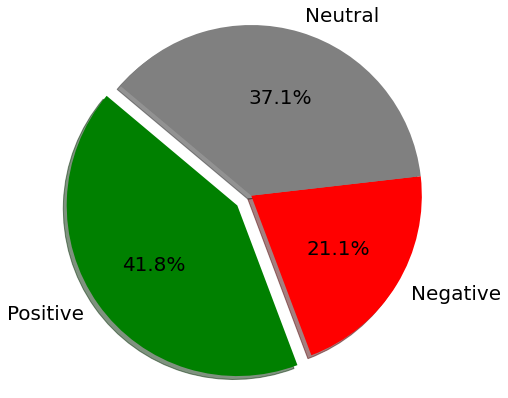

In [88]:
positive_count = 0
negative_count = 0
neutral_count = 0


        
for i in range(len(results)):
    if results[i]['compound'] >= 0.25:
        positive_count += 1
    elif results[i]['compound'] <= -0.25:
        negative_count += 1
    else:
        neutral_count += 1


# Data for the pie chart
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive_count, negative_count, neutral_count]
colors = ['green', 'red', 'gray']
explode = (0.1, 0, 0) 

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140, textprops={'color': 'black', 'fontsize': 20})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()